# CLASE 4.2: INTRODUCCIÓN A LA COMPUTACIÓN SIMBÓLICA CON SYMPY.
---
## Introducción.
La computación simbólica corresponde a un paradigma de computación completamente diferente al basado en arreglos numéricos que hemos estado desarrollando durante la asignatura. En un software de computación simbólica (conocidos popularmente como sistemas de álgebra computacional, o CAS), las representaciones de objetos matemáticos y expresiones se manipulan y transforman analíticamente, de la misma forma en que haríamos cálculos con lápiz y papel, aunque -por supuesto- con un alcance mucho mayor. Por tanto, la computación simbólica constituye una fantástica herramienta para el chequeo y *debugging* de cálculos analíticos hechos a mano y, más importante aún, para llevar a cabo análisis que, de otro modo, serían imposibles de realizar.

La computacional simbólica es un elemento clave de la computación científica, e incluso para problemas que pueden ser resueltos únicamente mediante métodos numéricos (lo que es muy común en el campo de la ciencia de datos), podemos hacer una gran diferencia al llegar a los límites de los cálculos analíticos que pueden realizarse antes de proceder a la implementación de técnicas numéricas. Aquello puede, por ejemplo, reducir la complejidad o el tamaño de un problema previo a resolverlo numéricamente. En otras palabras, en vez de resolver un problema de manera inmediata mediante algún método numérico, las herramientas de computación simbólica nos permitirán simplificarlo primero.

Existen algunas librerías de computación científica en Python, siendo **Sympy** (acrónimo de *Symbolic Python*), indudablemente, la más popular de todas. **Sympy** es una librería escrita completamente en Python y nos provee de herramientas para la resolución de un amplio rango de problemas de naturaleza analítica. Y en esta sección, nos dedicaremos a conocer en parte cómo hacer uso de **Sympy** para resolver este tipo de problemas. Esta librería no se encuentra incluida en algunas versiones de Anaconda, pero podemos instalarla fácilmente usando una terminal como sigue:

`conda install sympy`

En general, **Sympy** suele importarse de manera tal que tengamos acceso directo a todas sus funciones (mediante instrucciones del tipo `from sympy import *`). Sin embargo, a fin de tener claridad en relación a lo que hacemos, importaremos este módulo de manera directa, a fin de usar su nombre como prefijo para todas sus funciones (o bien, importaremos funciones específicas):

In [1]:
# Importamos Sympy.
import sympy

Haremos uso, en primera instancia, de la función `sympy.init_printing()`, la cual nos permitirá configurar el sistema de impresión en pantalla de **Sympy** para así renderizar expresiones matemáticas bastante bonitas a la vista, muy similares a las que podemos generar mediante el uso de LaTeX:

In [2]:
# Inicializamos el sistema de impresión de expresiones matemáticas.
sympy.init_printing()

**NOTA IMPORTANTE:** Notemos que **Numpy** y **Sympy**, como suele ocurrir con otras librerías de Python, nos proveen de muchas variables y funciones con el mismo nombre. Sin embargo, estos símbolos rara vez serán intercambiables. Por ejemplo, `numpy.pi` nos proveerá de un valor aproximado del número $\pi$, mientras que `sympy.pi` nos proveerá de una representación simbólica de $\pi$. Por lo tanto, es importante no mezclar ambas cosas.

## Símbolos.
Un atributo esencial de **Sympy** es la representación de símbolos matemáticos por medio de objetos de Python. En esta librería, por ejemplo, podemos utilizar la clase `sympy.Symbol` para este propósito. Una instancia de `sympy.Symbol` tiene siempre un nombre y un conjunto de atributos que describen sus propiedades, y métodos que permiten consultar tales propiedades y para operar sobre estos objetos simbólicos. Un símbolo por sí mismo no es de mucha utilidad, pero son utilizados como nodos en árboles completos que representan expresiones algebraicas. El paso cero a la hora de resolver un problema utilizando herramientas de **Sympy**, es precisamente crear símbolos para las variables matemáticas involucradas y las constantes que son necesarias para resolver dicho problema.

El nombre de un símbolo se define siempre por medio de un string, el cual, de manera opcional, puede incluir sintaxis de LaTeX para forzar a **Sympy** a representar simbólicamente lo que nosotros queremos en un entorno potenciado por **IPython** (como un notebook de Jupyter). Este nombre se establece al crear el símbolo, y dicha creación puede hacerse de varias maneras, usando clases y funciones tales como `sympy.Symbol`, `sympy.symbols()` y `sympy.var()`. En general, es deseable asociar los símbolos creados en **Sympy** a variables de Python que tengan el mismo nombren(o lo más parecido posible). Por ejemplo, podemos crear un símbolo en **Sympy** que represente a una variable $x$, y luego asociarlo a un objeto de Python que llamamos `x`:

In [3]:
# Nuestra primera variable en Sympy.
x = sympy.Symbol("x")

La variable `x` ahora representa un símbolo matemático abstracto $x$ del cual sabemos muy poca información por defecto. En este punto, `x` podría representar, por ejemplo, un número real, un entero, un número complejo, una función, o cualquier otra entidad de naturaleza matemática. En muchos casos, es suficiente representar un símbolo matemático con este nivel de abstracción, pero a veces puede resultar necesario darle a **Sympy** pistas acerca del tipo de símbolo que estamos representando, lo que sinduda puede ayudar a **Sympy** a manipular de forma más eficiente expresiones analíticas. Podemos añadir varios supuestos que permitan describir las propiedades de un objeto simbólico mediante el uso de algunos argumentos propios de las funciones que crean estos símbolos (por ejemplo, `sympy.Symbol`). Por ejemplo, si tenemos una variable matemática $\alpha$ que sabemos que es un número real, podemos usar el argumento Booleano `real` en la clase `sympy.Symbol` para definir dicha propiedad:

In [4]:
# Creación de un símbolo que representa un número real.
alpha = sympy.Symbol(r"\alpha", real=True)

In [5]:
# Mostramos el símbolo en pantalla.
alpha

Podemos consultar el atributo `is_real` del objeto anterior, a fin de confirmar que efectivamente dicho objeto representa un número real:

In [6]:
# Comprobamos que este objeto es, en efecto, un número real.
alpha.is_real

True

Si, por otro lado, si fuéramos a usar el atributo `is_real` para consultar el símbolo `x`, definido previamente, y para el cual no establecimos explícitamente que representa un número real (o de otro tipo), obtendríamos `None` como respuesta:

In [7]:
# Consultamos si x es un número real.
x.is_real is None

True

Otros atributos que denotan el tipo de símbolo a definir se muestran en la Tabla (2.1).

</p> <p style="text-align: center;">Tabla (2.1): Algunos tipos para los símbolos en Sympy y los argumentos que los definen</p>

| Argumentos | Atributos | Descripción |
| :--------- | :-------- | :---------- |
| `real`, `imaginary` | `is_real`, `is_imaginary` | Permite especificar si un símbolo representa un número real o imaginario. |
| `positive`, `negative` | `is_positive`, `is_negative` | Especifica si un símbolo es positivo o negativo. |
| `integer` | `is_integer` | Especifica si el símbolo es un entero. |
| `odd`, `even` | `is_odd`, `is_even` | Especifica si un símbolo es un entero par o impar. |
| `prime` | `is_prime` | Especifica si el símbolo es un número primo (y por tanto un entero). |
| `finite`, `infinite` | `is_finite`, `is_infinite` | Especifica si el símbolo representa una cantidad que es finita o infinita. |

Entre todos los tipos de símbolos que podemos crear (algunos de los cuales hemos explicitado en la Tabla (2.1)), indudablemente los atributos más importantes serán `real` y `positive`; es decir, si el símbolo representa (o no) un número real y positivo. Cuando aplican, la adición de estos supuestos puede, con frecuencia, ayudar a **Sympy** a simplificar varios tipos de expresiones. Consideremos el siguiente ejemplo:

In [8]:
# Definimos las variables simbólicas x e y.
x = sympy.Symbol("x")
y = sympy.Symbol("y", positive=True)

In [9]:
# Verificamos qué representa, simbólicamente, la raíz de x elevado al cuadrado.
sympy.sqrt(x ** 2)

In [10]:
# Y verificamos qué representa, simbólicamente, la raíz de y elevado al cuadrado.
sympy.sqrt(y ** 2)

En las líneas de código anteriores, hemos creado dos variables simbólicas, $x$ e $y$, y hemos computado la raíz cuadrada de los cuadrados de ambas variables, usando la función `sympy.sqrt()`. Si no existe información relativa al símbolo en cuestión, no podemos hacer ningún tipo de simplificación sobre esta expresión (al menos, así lo *entiende* **Sympy**). Sin embargo, si la variable simbólica es real y positiva, por supuesto que es posible simplificar esta expresión, ya que $\sqrt{y^{2}}=y$ para todo $y>0$, y eso es precisamente lo que **Sympy** reconoce.

Cuando trabajamos con símbolos matemáticos que representan números enteros, resulta útil especificar en forma explícita usando los correspondientes argumentos. Esto, por supuesto, con el objetivo de simplificar ciertas expresiones. Por ejemplo:

In [11]:
# Definimos tres enteros, cada uno con ciertas condiciones.
k = sympy.Symbol("k")
m = sympy.Symbol("m", integer=True)
n = sympy.Symbol("n", odd=True)

In [12]:
# Computamos algunas expresiones con estas variables simbólicas. Primero para k.
sympy.cos(k * sympy.pi)

In [13]:
# Luego para m.
sympy.cos(m * sympy.pi)

In [14]:
# Y finalmente para n.
sympy.cos(n * sympy.pi)

Comprobamos pues que, dependiendo de las propiedades que hemos supuesto para cada variable simbólica, **Sympy** tendrá más o menos opciones para construir simplificaciones de las expresiones simbólicas que queramos computar.

Para formular un problema matemático que, con frecuencia, no es trivial, será necesario definir una gran cantidad de símbolos. El uso de la clase `sympy.Symbol` para especificar cada símbolo, uno por uno, puede volverse un proceso tedioso y, por conveniencia, **Sympy** nos provee de la función `sympy.symbols()` para crear múltiples símbolos de una sola vez. Esta función recibe como argumento un string donde cada símbolo a definir se separa por comas dentro del mismo string, así como un conjunto arbitrario de argumentos que especifiquen los tipos asociados a cada variable simbólica (si tales tipos aplican). Por ejemplo:

In [15]:
# Definimos tres variables simbólicas negativas.
x, y, z = sympy.symbols("x, y, z", negative=True)

In [16]:
# Definimos tres variables simbólicas positivas.
u, v, w = sympy.symbols("u, v, w", positive=True)

## Números.
El propósito de representar símbolos matemáticos mediante objetos de Python es para usarlos en **árboles de cómputo** que representen expresiones matemáticas. Para ello, también necesitamos representar otros objetos matemáticos, tales como números, funciones y constantes. La creación de números, puntualmente, comparte muchas de las propiedades de los símbolos de **Sympy**, lo que nos permite tratar a ambos objetos de manera más o menos equitativa cuando construimos expresiones con ellos.

Por ejemplo, previamente, vimos que las instancias de `sympy.Symbol` tienen atributos que permiten consultar ciertas propiedades de la variable simbólica en cuestión (por ejemplo, `is_real`). Queremos usar este mismo tipo de atributos para todos nuestros objetos, incluyendo números enteros y de punto flotante, cuando manipulemos expresiones simbólicas de **Sympy**. Por esta razón, no podemos utilizar de manera directa los objetos nativos de Python que permiten construir este tipo de números (por ejemplo, `int` o `float`). En vez de ello, **Sympy** nos provee de las clases `sympy.Integer` y `sympy.Float`, los que representan números enteros y de punto flotante en su framework. Es importante tener siempre presente esta distinción en mente, aunque rara vez haremos uso explícito de estas clases, puesto que **Sympy** automáticamente crea instancias de estas clases cuando ocurren al usar esta librería en cómputos simbólicos. Sin embargo, para demostrar la diferencia entre números enteros y de punto flotante nativos de Python y provistos por **Sympy**, haremos uso explícito de estas clases:

In [17]:
# Creamos un entero k.
k = sympy.Integer(19)

In [18]:
# Verificamos el tipo de k.
type(k)

sympy.core.numbers.Integer

In [19]:
# Consultamos algunos atributos de k.
k.is_integer, k.is_odd, k.is_real

(True, True, True)

In [20]:
# Creamos un número de punto flotante p.
p = sympy.Float(4.7846593)

In [21]:
# Verificamos el tipo de p.
type(p)

sympy.core.numbers.Float

In [22]:
# Consultamos algunos atributos de p.
p.is_integer, p.is_odd, p.is_real

(False, False, True)

Siempre podremos *traer* instancias de `sympy.Integer` y `sympy.Float` de vuelta a sus correspondientes equivalentes de Python usando las funciones nativas `int()` y `float()`.

Para crear una representación en **Sympy** de un número o, en general, de una expresión arbitraria, podemos usar igualmente la función `sympy.sympify()`. Dicha función toma un amplio rango de entradas y permite derivar una expresión compatible con **Sympy**, eliminando la necesidad de especificar explícitamente qué tipos de objetos deben ser creados. Para el caso sencillo de un input numérico, podemos utilizar:

In [23]:
a1, a2 = sympy.sympify(20), sympy.sympify(4.7564)

In [24]:
type(a1), type(a2)

(sympy.core.numbers.Integer, sympy.core.numbers.Float)

Y ahí lo tenemos: **Sympy** infiere los tipos asociados a cada número.

### Enteros.
Anteriormente hemos usado la clase `sympy.Integer` para representar enteros. Al respecto, vale la pena distinguir las diferencias que existen entre una instancia de `sympy.Symbol` con el argumento `integer=True`, y una instancia de `sympy.Integer`. Mientras que una variable simbólica definida mediante `sympy.Symbol` con `integer=True` representa *algún* entero, una instancia de `sympy.Integer` representa un entero específico. En ambos casos, el atributo `is_integer` nos devolverá el valor Booleano `True`, pero también existe un atributo `is_Integer` (sí, con "I" mayúscula), que únicamente es `True` para instancias de `sympy.Integer`. En general, atributos cuyo nombre es del tipo `is_Name` (con "N" mayúscula) indican si el objeto respectiivo es de tipo `sympy.Name`, mientras que atributos de tipo `is_name` indican si dicho objeto satisface una condición establecida cuyo nombre es `name`. De esta manera, también existe un atributo `is_Symbol` que devuelve el valor `True` para objetos instanciados a partir de la clase `sympy.Symbol`:

In [25]:
# Definimos la variable simbólica n.
n = sympy.Symbol("n", integer=True)

In [26]:
# Consultamos algunos atributos de n.
n.is_integer, n.is_Integer, n.is_positive, n.is_Symbol

(True, False, None, True)

In [27]:
# Definimos un entero específico.
a1 = sympy.Integer(19)

In [28]:
# Consultamos algunos atributos específicos de a1.
a1.is_integer, a1.is_Integer, a1.is_positive, a1.is_Symbol

(True, True, True, False)

Los enteros en **Sympy** tienen una precisión arbitraria, lo que significa que no existen cotas superiores ni inferiores para limitar las cantidades que éstos pueden representar (lo que difiere de los tipos de datos vistos en **Numpy**). Por lo tanto, es posible trabajar en **Sympy** con números muy grandes:

In [29]:
# Un número extremadamente grande.
a1 ** 60

In [30]:
# Otro número muy muy grande.
sympy.factorial(60)

### Números de punto flotante.
También hemos hecho uso de la clase `sympy.Float` para definir números de punto flotante específicos. Como en el caso de la clase `sympy.Integer`, `sympy.Float` también permite generar números con precisión arbitraria (en este caso, representada por un número arbitrario de decimales). Cuando creamos una instancia de `sympy.Float` usando su constructor correspondiente, usualmente imputamos dos entradas: La primera es un número de punto flotante (escrito en Python) o un string que representa un número de punto flotante, y la segunda (que es opcional) corresponde a la precisión (número de decimales significativos) del objeto a instanciar. Por ejemplo, sabemos que el número real 0.8 no puede ser representado de manera exacta por medio de un número de punto flotante de tamaño fijo, y cuando imprimimos en pantalla 0.8 con 25 dígitos decimales significativos, este número se muestra como 0.8000000000000000444089210. La clase `sympy.Float` puede representar números reales sin estos problemas:

In [31]:
# Representación de punto flotante del número 0.8 con 25 dígitos decimales significativos.
"%.25f" % 0.8

'0.8000000000000000444089210'

In [32]:
# Representación de punto flotante del número 0.8 en Sympy con 25 dígitos decimales significativos.
sympy.Float("0.8", precision=25)

### Números racionales.
Un número racional corresponde a una fracción del tipo $p/q$, donde $p, q\in \mathbb{Z}$ y $q\neq 0$. **Sympy** representa este tipo de números usando la clase `sympy.Rational`. Los números racionales pueden crearse de forma explícita especificando el numerador y denominador respectivo:

In [33]:
# Creación de un número racional en Sympy.
sympy.Rational(1, 3)

Es posible que existan operaciones en **Sympy** que den como resultado números racionales:

In [34]:
# Creamos un par de números racionales.
r1 = sympy.Rational(1, 4)
r2 = sympy.Rational(3, 24)

In [35]:
# Al operar con ellos, el resultado es otro número racional (simplificado).
r1 * r2

In [36]:
# Y, a veces, un entero.
r1 / r2

### Constantes y símbolos especiales.
**Sympy** nos provee de símbolos predefinidos para varias constantes matemáticas y objetos matemáticos especiales, tales como la unidad imaginaria ($i$) o el símbolo infinito ($\infty$). Estos objetos se resumen en la Tabla (2.2), junto con sus correspondientes símbolos en **Sympy**. Notemos que, en particular, la unidad imaginaria se escribe como `I` en **Sympy** (y no como `i`, como cabría esperar).

</p> <p style="text-align: center;">Tabla (2.2): Algunas constantes matemáticas y símbolos especiales y sus correspondientes definiciones en Sympy</p>

| Símbolo matemático | Símbolo en **Sympy** | Descripción |
| :----------------- | :------------------- | :---------- |
| $\pi$ | `sympi.pi` | Razon entre el perímetro y el diámetro de una circunferencia. |
| $e$ | `sympy.E` | Base del logaritmo natural ($\log{e}=1$). |
| $\gamma$ | `sympy.EulerGamma` | Constante de Euler-Mascheroni: $\gamma =\displaystyle \lim_{n\rightarrow +\infty } \left[ \sum^{n}_{k=1} \frac{1}{k} -\log \left( n\right)  \right]  =\int^{+\infty }_{1} \left( \frac{1}{\left\lfloor x\right\rfloor  } -\frac{1}{x} \right)  dx$. |
| $i$ | `sympy.I` | Unidad imaginaria: $i=\sqrt{-1}$. |
| $\infty$ | `sympy.oo` | Símbolo que designa una cantidad infinitamente grande. |

## Funciones.
En **Sympy**, los objetos que representan funciones pueden ser creados mediante la clase `sympy.Function`. Como en el caso de `sympy.Symbol`, este objeto toma un nombre como primer argumento. **Sympy** distingue entre funciones definidas y no definidas, así como aplicadas y no aplicadas. La creación de una función mediante la clase `sympy.Function` resulta en una función abstracta (no definida) y no aplicada, que tiene un nombre, pero no puede ser evaluada porque su correspondiente expresión (o fórmula) no está definida. Una función de **Sympy** así definida puede representar una función arbitraria con un número también arbitrario de variables de entrada, ya que ésta no se ha aplicado sobre ningún símbolo o variable en particular. Una función no aplicada puede aplicarse sobre un conjunto de símbolos de entrada que representan el dominio de la misma, llamando a la instancia de dicha función con esos símbolos como argumentos. El resultado de ésto sigue siendo una función que no ha sido evaluada, pero ya fue aplicada al conjunto de variables de entrada especificadas, y por tanto cuenta con un set de variables dependientes. Como ejemplo de estos conceptos, consideremos el siguiente bloque de código:

In [37]:
# Definimos una tripleta de variables simbólicas de Sympy.
x, y, z = sympy.symbols("x, y, z")

In [38]:
# Definimos una función (abstracta) de estas tres variables,
f = sympy.Function("f")

In [39]:
# Verificamos el tipo de objeto que es f.
type(f)

sympy.core.function.UndefinedFunction

In [40]:
# Correspondencia de f con uno de sus argumentos (en este caso, x).
f(x)

In [41]:
# Asignación de variables de entrada a una función g.
g = sympy.Function("g")(x, y, z)

In [42]:
# Correspondencia de estas variables de entrada con respecto a la función g.
g

In [43]:
# Verificamos las variables (libres) de entrada de la función g.
g.free_symbols

En el bloque de código anterior hemos usado el atributo `free_symbols`, el cual retorna un conjunto de símbolos únicos que están contenidos en una expresión dada (en este caso, la función aplicada, no definida, `g`), a fin de demostrar que una función aplicada indudablemente está asociada con un conjunto específico de variables simbólicas de entrada. Más adelante daremos sentido a la importancia de este hecho, cuando consideremos derivadas de funciones abstractas. Una aplicación importante de las funciones de este tipo estriba en la especificación de ecuaciones diferenciales o, en palabras más sencillas, cuando una ecuación para una función es conocida, pero la función en sí misma no lo es.

En contraste con las funciones no definidas, una función definida es una función tal que ésta posee una implementación específica y que puede ser evaluada numéricamente para todo parámetro de entrada válido. **Sympy** dispone de funciones nativas para muchas funciones matemáticas estándar (por ejemplo, hay módulos tales como `sympy.functions.elementary` y `sympy.functions.special`) que pueden aplicarse de manera sencilla:

In [44]:
# La función coseno aplicada desde Sympy.
sympy.cos

cos

In [45]:
# Y también desde el módulo scipy.functions.elementary.
sympy.functions.elementary.trigonometric.cos

cos

In [46]:
# Función coseno completamente abstracta.
sympy.cos(x)

In [47]:
# Función coseno evaluada directamente sobre un valor determinado.
sympy.cos(sympy.pi / 4)

Cuando se aplica sobre un símbolo abstracto, como `x`, la función `sympy.cos()` conforma una función que no ha sido evaluada, pero cuando es posible, se puede evaluar sobre algún valor numérico específico:

In [48]:
# Definimos una variable entera n.
n = sympy.Symbol("n", integer=True)

In [49]:
# Calculamos el valor de la función coseno evaluada sobre un múltiplo n de sympy.pi/2.
sympy.cos(sympy.pi * n)

Un tercer tipo de función en **Sympy** corresponde a las funciones de tipo lambda, o funciones anónimas, en un sentido similar al de las funciones `lambda` en Python. Estas funciones son anónimas porque no tienen un nombre asignado, pero sí tienen un cuerpo bien definido que podemos evaluar. Este tipo de funciones se definen por medio de la clase `sympy.Lambda`:

In [50]:
# Una función anónima en Sympy.
h = sympy.Lambda(x, 1 + x**2)

In [51]:
# Mostramos en pantalla esta función.
h

In [52]:
# Evaluamos esta función en x = 6.
h(6)

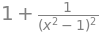

In [53]:
# Generamos una composición.
h(1 / (x**2 - 1))